# Rainfall basic classifier experiment

The goal of this notebook is to evaluate the "basic" program classifier using pre-labeled data from Kathi's rainfall dataset, no grammars or synthetic data.

In [1]:
%load_ext autoreload
%autoreload 2

# Setup

These cells initialize imports and load the dataset.

In [4]:
from autoplan.trainer import ClassifierTrainer
from autoplan.dataset import PrelabeledDataset
from autoplan.vis import plot_accuracy, plot_cm

from tqdm import tqdm_notebook as tqdm
import pandas as pd
import torch
import os


device = torch.device('cpu')
REPO_DIR = os.path.expanduser('~/autoplan')

In [5]:
dataset_name = 'T1'
dataset = PrelabeledDataset.load(f'{REPO_DIR}/data/rainfall/{dataset_name}.pkl')

In [14]:
dataset.dataset[0]

{'source': '#use "/course/cs017/src/ocaml/CS17setup.ml" ;;\n\n(* Prior to this course, I had relatively little programming experience. I had taken a very basic introductory course in 8th grade which focused on logo, a graphical display program, and I knew a decent amount about programming for TI calculators, but I did not take a programming class in high school. *)\n\n(* I spent about 25 minutes on this problem. *)\n\n(* I/P: a list of floats, alof *)\n(* O/P: the average of the non-negative integers in the list up to but not including the first occurence of -999. *)\n\nlet rec rainfall (alof : float list) : float = \n  let rec sum_helper (alof : float list) (sum : float) (counter : float) : (float * float) = \n    match alof, counter with\n      | [], 0. -> failwith "Empty list."\n      | -999. :: _, 0. -> failwith "Empty list."\n      | [], _ -> (sum, counter)\n      | -999. :: _, _ -> (sum, counter)\n      | hd :: tl, _ -> if hd >= 0. \n          then sum_helper tl (sum +. hd) (coun

# Classifier model

This model is a basic RNN that takes as input a tokenized representation of the program, and directly predicts the output label.

In [15]:
trainer = ClassifierTrainer(dataset, device=device, val_frac=0.3, model_opts={'embedding_size': 32, 'hidden_size': 64})
losses = []
train_eval = []
val_eval = []

In [8]:
for _ in tqdm(range(100)):
    losses.append(trainer.train_one_epoch())
    train, val = trainer.eval()
    train_eval.append(train)
    val_eval.append(val)

# Evaluation

These cells show the results of training the network.

## Loss

* Loss curve is smooth, indicating no issues in training
* Loss curve ends flat, indicating that we've learned everything the network can

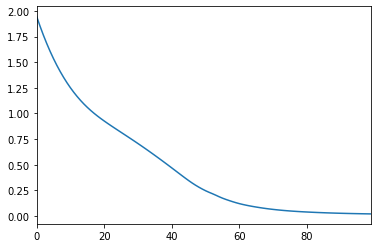

In [9]:
pd.Series(losses).plot()

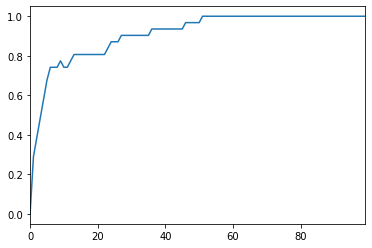

In [10]:
plot_accuracy(train_eval)

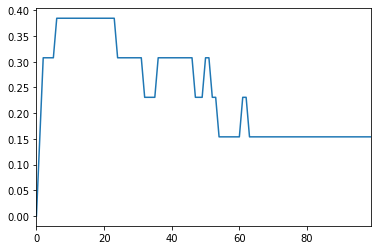

In [11]:
plot_accuracy(val_eval)

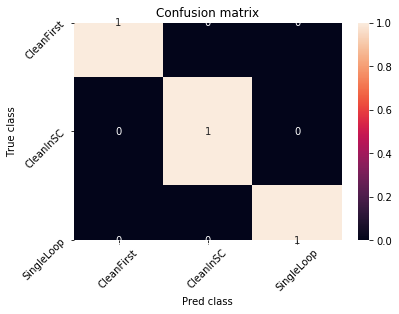

In [12]:
train_eval[-1].plot_cm()

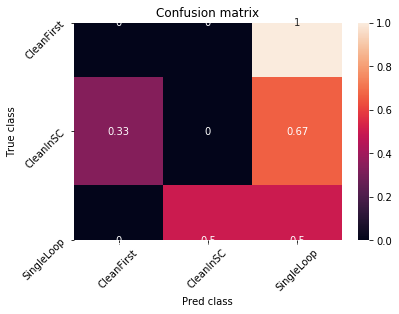

In [13]:
val_eval[-1].plot_cm()